In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

In [4]:
german = pd.read_csv('german_credit.csv')

train_indices, test_indices = train_test_split(np.array(german.index), test_size=0.2, random_state=0)

german_train = german.loc[train_indices].copy()
german_test = german.loc[test_indices].copy() 

In [5]:
german_train.head()

,status,duration,history,purpose,amount,savings,employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_under_maintenance,telephone,foreign_worker,default
687,A12,36,A33,A40,2862,A62,A75,4,A93,A101,...,A124,30,A143,A153,1,A173,1,0,1,0
500,A11,24,A32,A40,3123,A61,A72,4,A92,A101,...,A122,27,A143,A152,1,A173,1,0,1,1
332,A12,60,A32,A40,7408,A62,A72,4,A92,A101,...,A122,24,A143,A152,1,A174,1,0,1,1
979,A12,15,A31,A40,1264,A62,A73,2,A94,A101,...,A122,25,A143,A151,1,A173,1,0,1,1
817,A14,6,A34,A43,1554,A61,A74,1,A92,A101,...,A123,24,A143,A151,2,A173,1,1,1,0


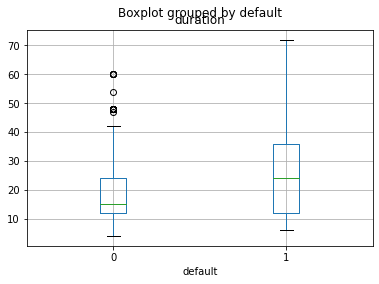

In [7]:
german_train.boxplot("duration", "default");

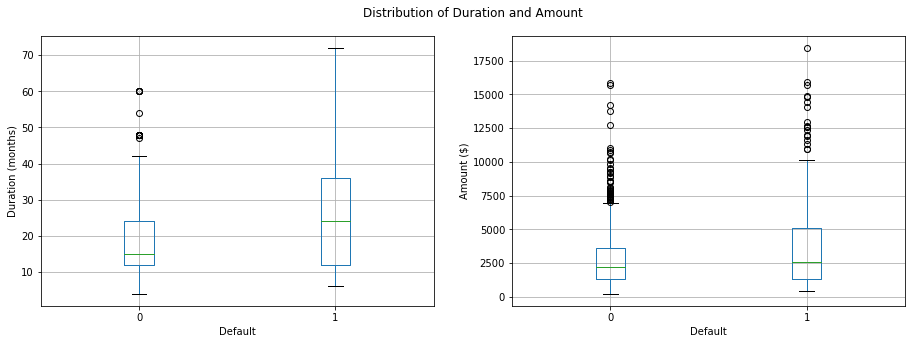

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

german_train.boxplot("duration", "default", ax=axs[0])
axs[0].set_ylabel("Duration (months)")
axs[0].set_xlabel("Default")
axs[0].set_title("")

german_train.boxplot("amount", "default", ax=axs[1])
axs[1].set_ylabel("Amount ($)")
axs[1].set_xlabel("Default")
axs[1].set_title("")

plt.suptitle("Distribution of Duration and Amount");

# Q1

In [28]:
import statsmodels.api as sm

In [26]:
german = pd.read_csv('german_credit.csv')

columns = ["default", "status", "duration", "history", "amount", "savings", "housing", "employment", "purpose"]
german_simplified = german.loc[:, columns].copy()

german_simplified_with_dummies = pd.get_dummies(german_simplified, drop_first=True)

train_indices, test_indices = train_test_split(german_simplified_with_dummies.index, test_size=0.2, random_state=0)

In [27]:
german_train = german_simplified_with_dummies.loc[train_indices, :].copy()
german_test = german_simplified_with_dummies.loc[test_indices, :].copy()

In [32]:
x_train = german_train.drop("default", axis=1)
y_train = german_train.loc[:, "default"]

x_test = german_test.drop("default", axis=1)
y_test = german_test.loc[:, "default"]


x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [36]:
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.459229
         Iterations 7


In [38]:
# print(model.summary())

# Q2

In [49]:
german = pd.read_csv('german_credit.csv')

columns = ["default", "status", "duration", "history", "amount", "savings", "housing", "employment", "purpose"]
german_simplified = german.loc[:, columns].copy()

In [50]:
german_simplified.head()

,default,status,duration,history,amount,savings,housing,employment,purpose
0,0,A11,6,A34,1169,A65,A152,A75,A43
1,1,A12,48,A32,5951,A61,A152,A73,A43
2,0,A14,12,A34,2096,A61,A152,A74,A46
3,0,A11,42,A32,7882,A61,A153,A74,A42
4,1,A11,24,A33,4870,A61,A153,A73,A40


In [65]:
german_simplified.replace(to_replace=["A32", "A33"], value="A32/A33", inplace=True)

german_simplified.replace(to_replace=["A40", "A44", "A45", "A49"], value="A40/A44/A45/A49", inplace=True)

german_simplified.replace(to_replace=['A41', 'A48'], value='A41/A48', inplace=True)

german_simplified.replace(to_replace=['A46', 'A410'], value='A46/A410', inplace=True)

german_simplified.replace(to_replace=['A61', 'A62', 'A63', 'A64', 'A65'], 
                          value=['A61/A62']*2 + ['A63/A64/A65']*3, inplace=True)

german_simplified.replace(to_replace=['A74', 'A75'], value='A74/A75', inplace=True)

german_simplified.replace(to_replace=['A151', 'A153'], value='A151/A153', inplace=True)

In [66]:
german_simplified.head()

,default,status,duration,history,amount,savings,housing,employment,purpose
0,0,A11,6,A34,1169,A63/A64/A65,A152,A74/A75,A43
1,1,A12,48,A32/A33,5951,A61/A62,A152,A73,A43
2,0,A14,12,A34,2096,A61/A62,A152,A74/A75,A46/A410
3,0,A11,42,A32/A33,7882,A61/A62,A151/A153,A74/A75,A42
4,1,A11,24,A32/A33,4870,A61/A62,A151/A153,A73,A40/A44/A45/A49


In [58]:
['A61/A62']*2 + ['A63/A64/A65']*3

['A61/A62', 'A61/A62', 'A63/A64/A65', 'A63/A64/A65', 'A63/A64/A65']

In [63]:
['A61', 'A62', 'A63', 'A64', 'A65']

['A61', 'A62', 'A63', 'A64', 'A65']

In [62]:
['A63/A64/A65']*3

['A63/A64/A65', 'A63/A64/A65', 'A63/A64/A65']

In [67]:
german_simplified.head()

,default,status,duration,history,amount,savings,housing,employment,purpose
0,0,A11,6,A34,1169,A63/A64/A65,A152,A74/A75,A43
1,1,A12,48,A32/A33,5951,A61/A62,A152,A73,A43
2,0,A14,12,A34,2096,A61/A62,A152,A74/A75,A46/A410
3,0,A11,42,A32/A33,7882,A61/A62,A151/A153,A74/A75,A42
4,1,A11,24,A32/A33,4870,A61/A62,A151/A153,A73,A40/A44/A45/A49


In [68]:
german_simplified_with_dummies = pd.get_dummies(german_simplified, drop_first=True)

train_indices, test_indices = train_test_split(german_simplified_with_dummies.index, test_size=0.2, random_state=0)

In [72]:
german_simplified_with_dummies.head()

,default,duration,amount,status_A12,status_A13,status_A14,history_A31,history_A32/A33,history_A34,savings_A63/A64/A65,housing_A152,employment_A72,employment_A73,employment_A74/A75,purpose_A41/A48,purpose_A42,purpose_A43,purpose_A46/A410
0,0,6,1169,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0
1,1,48,5951,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,0,12,2096,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
3,0,42,7882,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,1,24,4870,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [73]:
german_train = german_simplified_with_dummies.loc[train_indices, :].copy()
german_test = german_simplified_with_dummies.loc[test_indices, :].copy()

In [74]:
x_train = german_train.drop("default", axis=1)
y_train = german_train.loc[:, "default"]

x_test = german_test.drop("default", axis=1)
y_test = german_test.loc[:, "default"]


x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [75]:
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.467684
         Iterations 6


In [81]:
y_pred_probability = model.predict(x_test)
# y_pred = np.around(y_pred_probability)
y_pred = (y_pred_probability > 0.5).astype(int)

In [84]:
f1_score(y_test, y_pred)

0.485981308411215

In [92]:
round(0.5)

0

In [91]:
round(2.5)

2

In [87]:
round(3.5)

4

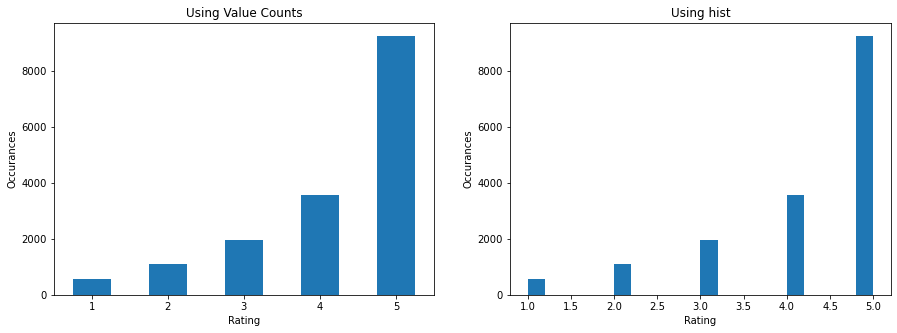

In [99]:
df = pd.read_csv('product_train.csv')

plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 2, 1)
df["Rating"].value_counts().sort_index().plot.bar(ax=ax, rot=0)

ax.set_title("Using Value Counts")
ax.set_xlabel('Rating')
ax.set_ylabel('Occurances')


plt.subplot(1, 2, 2)
plt.hist(df['Rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Occurances')
plt.title("Using hist");

In [112]:
german = pd.read_csv('german_credit.csv')

columns = ["default", "status", "duration", "history", "amount", "savings", "housing", "employment", "purpose"]
german_simplified = german.loc[:, columns].copy()

german_simplified.replace(to_replace=["A32", "A33"], value="A32/A33", inplace=True)
german_simplified.replace(to_replace=["A40", "A44", "A45", "A49"], value="A40/A44/A45/A49", inplace=True)
german_simplified.replace(to_replace=['A41', 'A48'], value='A41/A48', inplace=True)
german_simplified.replace(to_replace=['A46', 'A410'], value='A46/A410', inplace=True)
german_simplified.replace(to_replace=['A61', 'A62', 'A63', 'A64', 'A65'], 
                          value=['A61/A62']*2 + ['A63/A64/A65']*3, inplace=True)
german_simplified.replace(to_replace=['A74', 'A75'], value='A74/A75', inplace=True)
german_simplified.replace(to_replace=['A151', 'A153'], value='A151/A153', inplace=True)

german_simplified_with_dummies = pd.get_dummies(german_simplified, drop_first=True)

train_indices, test_indices = train_test_split(german_simplified_with_dummies.index, test_size=0.2, random_state=0)

german_train = german_simplified_with_dummies.loc[train_indices, :].copy()
german_test = german_simplified_with_dummies.loc[test_indices, :].copy()

x_train = german_train.drop("default", axis=1)
y_train = german_train.loc[:, "default"]

x_test = german_test.drop("default", axis=1)
y_test = german_test.loc[:, "default"]


x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model = sm.Logit(y_train, x_train).fit()

y_pred_probability = model.predict(x_test)
y_pred = (y_pred_probability > 1/6).astype(int)

Optimization terminated successfully.
         Current function value: 0.467684
         Iterations 6


In [113]:
f1_score(y_test, y_pred)

0.5193370165745856

In [116]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).flatten()
(fp + 5 * fn) / len(y_pred)

0.655